## Teaching Machines to Learn, Part 2

<img src=https://github.com/computationaljournalism/columbia2018/raw/master/images/monolith.jpg width=60%>

**Two cultures**

We are going to consider a general purpose learning machine. It was developed in large part by Leo Breiman. [Later in his career, he was one of the first to write about algorithms for working with data,](https://projecteuclid.org/euclid.ss/1009213726) framing the discussion as a kind of disciplinary divide between traditional statistics and more modern (at the time) computer scientists -- what he refers to as the "two cultures" in modeling. In his opening paragraph, he nicely summarizes two goals for creating a data model, which we can talk about in the context of Kosinski's work. 

<img src=https://github.com/computationaljournalism/columbia2018/raw/master/images/lb1.jpg width=40%>

Breiman argues that statistics has been consumed with what's in the box, and their tools start by tryig to explain how data are created. Tools like regression or logistic regression as used by Kosinski are examples (we'll come back to them). By contrast the "new models" he is referring to in his paper are more concerned with prediction, allowing them to be freer in their approaches to a problem. They don't prejudge what nature's up to, but instead only care about the success of the algorithm. This idea matches Kosinski's comments about judging algorithmic work based on its outputs. Is it racist? Is it doing harm?

We will start with a model that is easy to interpret but often too inflexible to predict very well. It is one of the most frequentlyused models we have and was developed almost entirely by one man, Francis Galton.

**Linear regression**

[Start with PDF of background slides](https://www.dropbox.com/s/jb6yni2txtodaoj/17_TeachingMachinesToLearn_b.pdf?dl=0)

A linear regression attempts to find the relationship between two sets of variables -- one or more "independent variables" or "predictors" and a dependent variable or "outcome". To start, given a data set with two columns, X and Y, its task is to find a line that best describes Y as a function of X. It is used to figure out serious things in the real world like GDP, exchange rates, money flows, etc. and is a heavily used research tool in the social and political sciences.  

We will use SciKit Learn to create the fit. If you haven't yet, please install some code.

In [ ]:
%%sh
pip install sklearn --upgrade
pip install pydotplus

In [ ]:
from pandas import read_csv

height = read_csv("galton.csv")
height.head()

For simplicity we are going to plot this using plotly. 

In [ ]:
from plotly.plotly import iplot, sign_in
import plotly.graph_objs as go

sign_in("cocteautt","8YLww0QuMPVQ46meAMaq")

In [ ]:
myplot_parts = [go.Scatter(x=height["midparent"],y=height["child"],mode="markers",name="data")]
mylayout = go.Layout(autosize=False, width=500,height=500)
myfigure = go.Figure(data = myplot_parts, layout = mylayout)
iplot(myfigure,filename="example")

In [ ]:
# build a model that tries to fit this data. we start with linear regression
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(height[["midparent"]], height["child"])

print(model.intercept_)
print(model.coef_)

In [ ]:
myplot_parts = [go.Scatter(x=height["midparent"],y=height["child"],mode="markers",name="data"),
                go.Scatter(x=height["midparent"],y=model.predict(height[["midparent"]]),name="regression line")]
mylayout = go.Layout(autosize=False, width=500,height=500)
myfigure = go.Figure(data = myplot_parts, layout = mylayout)
iplot(myfigure,filename="example")

Of course you can apply this to any data set we've seen so far in an attempt to understand something about how variables relate, perhaps how nature works. Often, the narrative content has to do with the slope - is it positive or negative? How big is it? This allows us to tell stories about how two variables relate to each other. It is possible to beef up this technique considerably and it is at the core of a lot of more advanced fitting procedures. 

In [ ]:
from pandas import read_csv

data = read_csv("hardest.csv")
data.dropna(axis=0,how="any",inplace=True)

In [ ]:
model = LinearRegression()
model.fit(data[["education"]], data["income"])

print(model.intercept_)
print(model.coef_)

In [ ]:
myplot_parts = [go.Scatter(x=data["education"],y=data["income"],mode="markers",name="data"),
                go.Scatter(x=data["education"],y=model.predict(data[["education"]]),name="regression line")]
mylayout = go.Layout(autosize=False, width=600,height=600)
myfigure = go.Figure(data = myplot_parts, layout = mylayout)
iplot(myfigure,filename="example")

In his paper, Brieman distills the two main properties of models as "interpretation" and "prediction."  Simple linear regression is heavy on interpretation but light on prediction (see what happens if you try to fit a simple line to most of the data in the "hardest" data set. 

According to Breiman, the tools we are going to look at next, a class of models known as "decision trees" score an "A+ for interpretation" but, according to Breiman, just a B+ on prediction. You'll see why. Brieman introduced decision trees in statistical practice, but then extended them to create an A+ predictor out of them. We'll see!

**Decision trees**

A **decision tree** is statistical model that is at one time a useful visualization as well as a prediction engine. It falls under Breiman's classification as an algorithmic tool because it originated outside of statistics and does not start with a set of assumptions about how nature works. Instead, it finds associations through an algorithm. Now, it's an interesting case bacause the tool itself is fairly powerful as an explanatory engine -- its visualization carries considerable narrative content about how nature might be making decisions. This is why it scores an A+ for interpretability. 

So let's have a look at an example. The data comes from the election in 2008, and specifically during the democratic primary. It was developed by Amanda Cox, an outstanding visual journalist at The New York Times. I use such old data because this piece is a near perfect distillation of what I mean by the narrative content in these models.

![tree](https://static01.nyt.com/images/2008/04/16/us/0416-nat-subOBAMA.jpg)

Have a look. The tree is like a game of 20 questions. If you want to know how a county will vote, answer a few questions. What is the racial makeup? What about the HS graduation rate? Where in the country is the county? 

The questions are in the form of a tree -- as we have seen before, computer scientists grow their trees upside down. As you answer questions, you eventually end up at a leaf and a decision is made. Note that it's not perfect -- there is some uncertainty in the decision. 

To show that this isn't a one-off, ProPublica had a lovely project called the [Message Machine](https://projects.propublica.org/emails/) where they looked email messages sent out by [political campaigns](https://www.propublica.org/special/message-machine-you-probably-dont-know-janet) and [reverse engineered the logic that generated them.](https://www.propublica.org/article/message-machine-starts-providing-answers)


Let's load up the data and see how such a thing comes into existence.

In [ ]:
from pandas import read_csv,set_option
set_option('display.max_columns', 100)

In [ ]:
primary = read_csv("primary.csv")
primary.head()

In [ ]:
primary.shape

In [ ]:
primary.columns

At the point this graphic was published Montana, Oregon, South Dakota, Indiana, Kentucky, West Virginia, Pennsylvania, and South Carolina had yet to have their primaries. In all, there should be 2,261 counties for analysis. Here's where NY state had landed.

In [ ]:
primary[primary["state_postal"]=="NY"][["county_name","winner"]]

And here is how the various counties across the country voted.

In [ ]:
primary["winner"].value_counts()

Now, given all these potential predictor variables, which ones "explain" county-level voting patterns? Suppose, for example, we start simply, and consider whether or not a majority of the county voted for Bush in 2004. 

In [ ]:
from pandas import crosstab

In [ ]:
crosstab(primary["winner"],primary["pres04winner"])

In [ ]:
290/(290+163)

In [ ]:
1047/(1047+740)

Therefore, Obama won about 64% of those counties not voting for Bush in 04, while Clinton won about 59% of those counties that did vote for Bush in 04. Now, consider the **simple prediction rule**: If a county voted for Bush in 04, we’ll say that they will vote for Clinton in the primary, while if a county was mostly in favor of Kerry in 04, we’ll assign the win to Obama. 

Of course this rule isn’t perfect; by applying it, we would make 163 + 740 =
903 mistakes (out of 2,261 counties, or about 40% error); we refer to these mistakes as having been "misclassified" by our simple rule. So the question becomes, can we do any better? What do you think?

In [ ]:
(163 + 740)

In [ ]:
(163 + 740)/2261

There might be better indicators of Obama’s success besides the vote in 2004 -- but how do we find them? The decision tree encodes a large search across the complete data set for predictors that are informative. 

Consider the top of the tree, "the root". Decision trees work by repeatedly splitting the data into two parts; the root or first "split" is the single division of the data into two pieces that produces the lowest misclassification error (well, it's a little more complicated, but this will do).

To investigate this a little further, let’s consider the predictor that represents the
percentage of a county that is African American; we now choose a breakpoint that divides the data into two pieces (those counties with a greater percentage of African Americans and those with a smaller percentage). We then form a table (as we did for counties that went for Bush or Kerry in 2004) and count the misclassification rate.

Suppose we take 10% as the cutoff. We get the following table. How many errors do we make? What is the misclassification rate?

In [ ]:
crosstab(primary["winner"],primary["black06pct"]< 0.1)

In [ ]:
# Error rate?


To do this a bit less hands-on, how can we compute the error rate from the entries of the table directly? Notice that the errors are a function of each column, named `True` and `False` (yes, you can use booleans as names for columns). Then, we created a rule that predicts everyone in column `True` (their precint was less than 10% African American), say, as going for Clinton. We did this because among this category of counties, she won more than Obama. Her wins correspond to the `max()` counts in the column `True`. 

If we always assign the victor according to the candidate who won the most counties in the column `True`, then our mistakes will always be the `min()` counts in the column `True`. Get it? Let's test it out.

In [ ]:
predict = crosstab(primary["winner"],primary["black06pct"]< 0.1)
predict

In [ ]:
min(predict[False])

In [ ]:
min(predict[True])

Summing these two numbers gives you the total number of mistakes we would make if we had a prediction rule that said counties that are less than 10% African Amerian vote for Clinton and those that have a larger percentage will go for Obama. Get it?

Now, the 20% figure at the root of the tree was obtained by finding the magic point that minimizes the misclassification errors. In fact, the search was conducted over all the variables in the data set and all the possible splits; and this choice produced the smallest error.

Once this node has been chosen, we work our way down the tree, conducting the same search but on the specified subsets of the data, at each step attempting to minimize our errors. 

For quantitative variables, we have a choice of split points, and so the algorithm goes through a search. Here we vary a cutoff for the percentage of African Americans living in a county from essentially 0 to 0.5. For each choice of cutoff, we look at the associated error. 

What do you see?

In [ ]:
fractions = [i/1000 for i in range(1,500)]
error = []

for f in fractions:
    
    predict = crosstab(primary["winner"],primary["black06pct"]< f)

    # right branch
    error_right = min(predict[True])
    
    # left branch
    error_left = min(predict[False])
    
    error.append(error_left+error_right)

In [ ]:
from plotly.plotly import iplot, sign_in
import plotly.graph_objs as go

sign_in("cocteautt","8YLww0QuMPVQ46meAMaq")

myplot_parts = [go.Scatter(x=fractions,y=error,mode="line")]
mylayout = go.Layout(autosize=False, width=1000,height=500)
myfigure = go.Figure(data = myplot_parts, layout = mylayout)
iplot(myfigure,filename="errors")

Let's try another variable. How about the percentage of the vote in a county that was for Bush in 2004? The column is called `Bush04`. Let's see what that range is across the counties in our data set.

In [ ]:
primary["Bush04"].describe()

So among all the counties in the data set, the lowest vote percentage for Bush was 9% and the highest was 92%. So let's create a plot like the one above, but now we want our fractions to go from say .1 to .9, or 10-90%. 

In [ ]:
fractions = [i/1000 for i in range(100,900)]
error = []

for f in fractions:
    
    predict = crosstab(primary["winner"],primary["Bush04"]< f)

    # right branch
    error_right = min(predict[True])
    
    # left branch
    error_left = min(predict[False])
    
    error.append(error_left+error_right)


In [ ]:
myplot_parts = [go.Scatter(x=fractions,y=error,mode="line")]
mylayout = go.Layout(autosize=False, width=1000,height=500)
myfigure = go.Figure(data = myplot_parts, layout = mylayout)
iplot(myfigure,filename="errors")

Notice the lowest error rate we can come up with would classify a county as favoring Obama if the vote percentage for Bush in 2004 was 58% or less. All other counties would be predicted as voting for Clinton. Using this rule, we make 850 mistakes and this is as good as we can do with this predictor variable. 

In [ ]:
 crosstab(primary["winner"],primary["Bush04"]< 0.58)

Now, look at the data and try another variable or two, either discrete or continuous (so a table or a curve) and tell me what the error rate is. 

In [ ]:
# your code here



This is essentially what the decision tree process does. Given a set of counties and measurement on those counties, it searches for the best *split* of the data into two parts, trying to find the best prediction rule. Once we find the best we then treat the two parts separately. We look at the data under `True`, say, and look through all the variables and try to divide it into two pieces. We then look at the data left over under `False` and find its best predictor. And we just keep going.

This is an example of  a *greedy algorithm*, meaning at each step, it is looking for the best way to divide the data into two pieces. There are things we can do to speed it up computationally, and there are issues with really trying to minimize misclassification rates, but this is essentially the approach.

Stop and think what this simple process has produced for us; we have a very intuitive structure (something akin to the game 20 questions) that makes evident "important" variables that help "explain" voting patterns. This kind of tool lives somewhere between data analysis and modeling; it is technically a model all by itself (making predictions) but is often used as a way to identify important predictors for another stage of model.

This decision tree is part of a large class of methods called CART for Classification and Regression Trees and was developed in the 1980s as part of a move to deal with bigger and meaner data sets.

**Fitting a tree**

We will use a package called Scikit Learn to do the actual tree growing. Amanda Cox, having a Master's degree in Statistics, used R and so our fits and process will be a little different than hers. First, we need to do something about the missing values. Scikit Learn is a little weak in what it's capable of, but it's usable. It is possible to work around NA's in Brieman's algorithm, but for now we have to drop any row that has a missing value.

In [ ]:
primary.shape

In [ ]:
primary.dropna(inplace=True)

In [ ]:
primary.shape

So we are down about 40 counties. Now, let's load up what columns we want to model with, and create a data set consisting of only those predictor variables (also called *features* or *independent variables* in a learning problem). We will also create a single column for the variable we'd like to predict (also called the *dependent variable*). 

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

# list out the columns we want to include (potentially) in our model.
# the tree algorithm will search over these as we searched for the "best" predictors.
features = ["pres04margin","black06pct","hisp06pct","white06pct","growth",
            "pct_less_30k","pct_more_100k","pct_hs_grad","pct_homeowner","POP05_SQMI"]

# create a response variable and the data frame of predictors 
y = list(primary["winner"])
X = primary[features]

# create a tree fitting machine that will only split down to a "depth" of 3
dt = DecisionTreeClassifier(max_depth=3)

# and use the machine make the fit with our data.
tree = dt.fit(X, y)

Now, let's have a look. It won't be as nice as Amanda's but it will help us explore the relationships between variables in our data set. Remember trees are A+ on interpretability. If you haven't, first install a package that will draw our trees.

In [ ]:
%%sh
conda install graphviz

And draw the tree! This is largely readable (feature names, class names, etc) and otherwise is a kind of copy-and-repeat bit of code.

In [ ]:
from IPython.display import Image  
from pydotplus import graph_from_dot_data

dot_data = export_graphviz(tree, out_file=None, 
                         feature_names=features,
                         class_names=["clinton","obama"],  
                         filled=True, rounded=True)  
graph = graph_from_dot_data(dot_data)  

Image(graph.create_png()) 

Let’s think a bit more about the tree-growing process; with each split, we cut
our data at the node into two pieces so that the “sample size” at each of the child nodes is lower than its parents. We then represent the data in the leaves with a simple model; for our 0/1 data (Obama or Clinton), we classify leaves according to majority vote.

In principle we can grow trees until there’s a single entry in each node -- What
might be the problem with that? How do we decide to stop splitting? When we
run out of data? 

The algorithm Brieman developed grows a big tree and then *prunes it back*. So take the tree we have above, and you can see that most of the right side of the tree remains for Obama, no matter how far down we split. That means that the Clinton counties remain mistakes. We've added a lot of complexity to the tree, but really, stopping at the first split is all we need. We can prune back splits that add more complexity than they're worth.

![tree](https://static01.nyt.com/images/2008/04/16/us/0416-nat-subOBAMA.jpg)

In the R displays above (unlike the SciKit Learn output) the heights of the branches correspond to the error in represented by the model. So, the at the root, we are dealing with all the counties -- 1210 went for Clinton
and 1031 for Obama -- therefore since Clinton won more counties, we would
predict all future counties for Clinton, making 1030 mistakes.

The first split on the percentage of the county that is
African American brought us down to 700 errors, a big drop; the next division
based on education is another big drop, about half the size. As we continue to refine the tree, however, the improvements diminish.

In the mid-1980s a fair bit of theoretical and methodological work was devoted
to understanding the behavior of this kind of algorithm; we are using it as a bit
of data analysis (how does a “response” relate to the potential “explanatory”
variables?) but it can also be used as a tool for making predictions.

A lovely graphical introduciton to decision trees is [given here.](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)

**More recent data**

Here is a data set collected by Loren Collingwood, a political scientist. It accumulates many of the same county-level variables but is looking at the recent national election instead. Let's try out our new learning skills with SciKit Learn!

In [ ]:
from pandas import read_csv, set_option
data = read_csv("http://www.collingwoodresearch.com/uploads/8/3/6/0/8360930/county_data.csv",sep="\t")

In [ ]:
set_option("display.max.columns",100)
data.head()

In [ ]:
data.columns

Unlike the data from the NYT, we don't have a `winner` specified -- we only have the percentage earned by each candidate. So we will use a list comprehension to create a column called `winner` giving the county to Clinton if she had a greater percentage of the vote than Trump.

In [ ]:
data["winner"] = ['Trump' if data["pct_clinton"][i] < data["pct_trump"][i] else 'Clinton' for i in range(data.shape[0])]

And check that it's there (scroll way over to the right).

In [ ]:
data.head(10)

In [ ]:
data["winner"].value_counts()

Yes, well, there we are. So let's fit the tree and see what we find.

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

features = ["per_capita_income","pobama12cnty","percent_white"]

y = list(data["winner"])
X = data[features]

dt = DecisionTreeClassifier(max_depth=3)
tree = dt.fit(X, y)

In [ ]:
from IPython.display import Image  
from pydotplus import graph_from_dot_data

dot_data = export_graphviz(tree, out_file=None, 
                         feature_names=features,
                         class_names=["Clinton","Trump"],  
                         filled=True, rounded=True)  
graph = graph_from_dot_data(dot_data)  

Image(graph.create_png()) 

This was just a toy example. There are so many variables and in principle we can put all of them into the mix and see what happens. Collingwood didn't have a dictionary for his data, but he was able to answer a few questions. Here are the columns I couldn't read easily and his explanations.

>totpop1014cnty what does 1014 refer to? 1014 IS SAMPLED BETWEEN YEARS 2010-14 FOR ACES <br>
ppiwht1014cnty ppi? --I'M PRETTY SURE THIS IS PERCENT WHITE, THN PERCENT BLACK, ETC. <br>
ppiblk1014cnty <br>
ppihisp1014cnty <br>
pimm1014cnty mm? PERCENT IMMIGRANT <br>
ppi0014cnty ppi again and what is 0014? THE 0014 WOULD NOW BE A CHANGE MEASURE -- PERCENT CHANGE FROM 2000 TO 2014. <br>
psocsec0014cnty <br>
ownthirty0014cnty ownthirty? <br>
ownfifty0014cnty <br>
pmanufact1014cnty ? employment in manufacturing? CORRECT -- THIS WAS PREDICTOR OF TRUMP VOTE <br>
pct65over00cnty this is in 2000? YES, FOR OLD PEOPLE <br>
medoohvalue00cnty ? MEDIAN HOME VALUE 2000 <br>
pctcomlong00cnty comlong? I THINK THIS IS COMMUTE OVER 30 MINS -- BUT I DIDN'T USE THIS SO NOT 100% ON THAT. <br>
pctdiffh95_00cnty ? NOT SURE <br>
pctfb00cnty ? FOREIGN BORN <br>
pcpi00cnty pcpi? NOT SURE <br>
Rpt. ? NOT SURE <br>
state.y STATE NAME/CODE. PROBABLY A state.x AS WELL? FUNCTION OF MERGING IN R <br>
pct_change_R ? <br>
manu_loss ? IS THIS A DUMMY? IF SO, DID THE COUNTY RECEIVE MANUFACTURING LOSS IF YES = 1, ELSE = 0 <br>
rural ? RURAL COUNTY BASED OFF OFFICIAL CENSUS DESIGNATION (DUMMY) <br>
rural_150 ? SIMILAR MEASURE, THIS IS THE ONE I THINK IS BASED OF 100 PER SQ/MILE. BUT WOULD HAVE TO CHECK<br>

We are now going to show you how these procedures are used in "higher stakes" settings, such as those referred to by Kosinski. Specifically we'll look at Predictive Policing and their use of tree-based methods.  (Then we refer to the [PDF](https://www.dropbox.com/s/2ouigzpwobm2ux1/17_TeachingMachinesToLearn.pdf?dl=0))

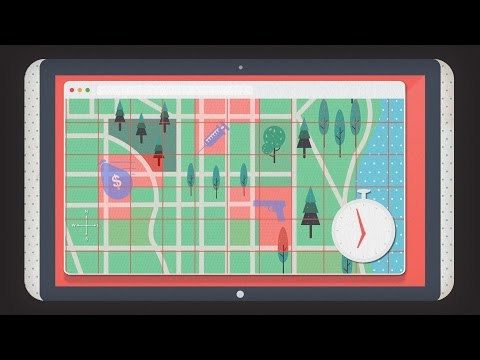

In [107]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('YxvyeaL7NEM')